<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [6]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




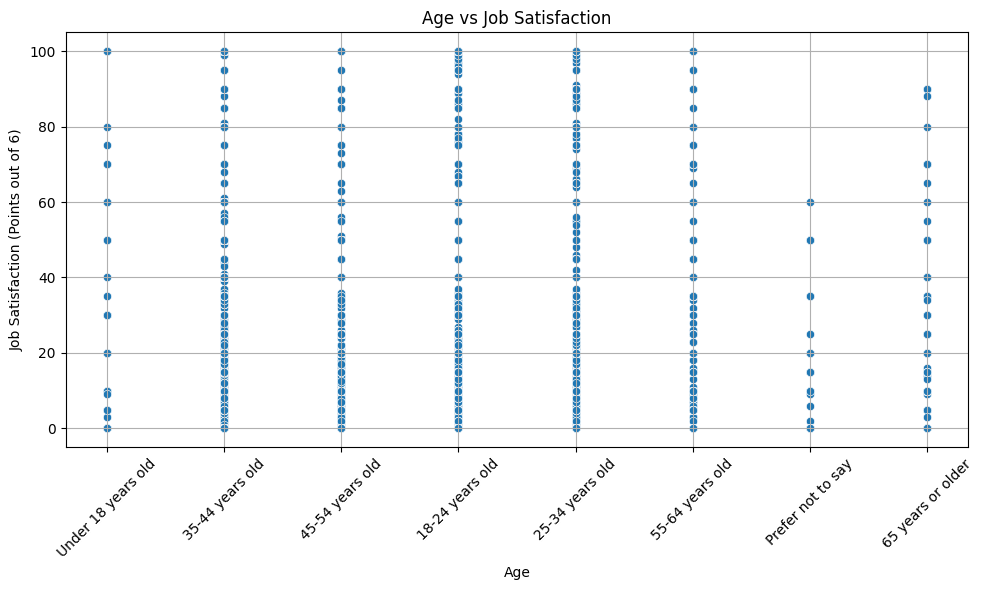

In [28]:
# import seaborn as sns

df = pd.read_csv(file_path)
# Simplify into buckets
# df['JobSatBucket'] = pd.cut(df['JobSatPoints_6'], bins=[0, 20, 40, 60, 80, 100], labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='JobSatPoints_6')
plt.xticks(rotation=45)
plt.title('Age vs Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (Points out of 6)')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


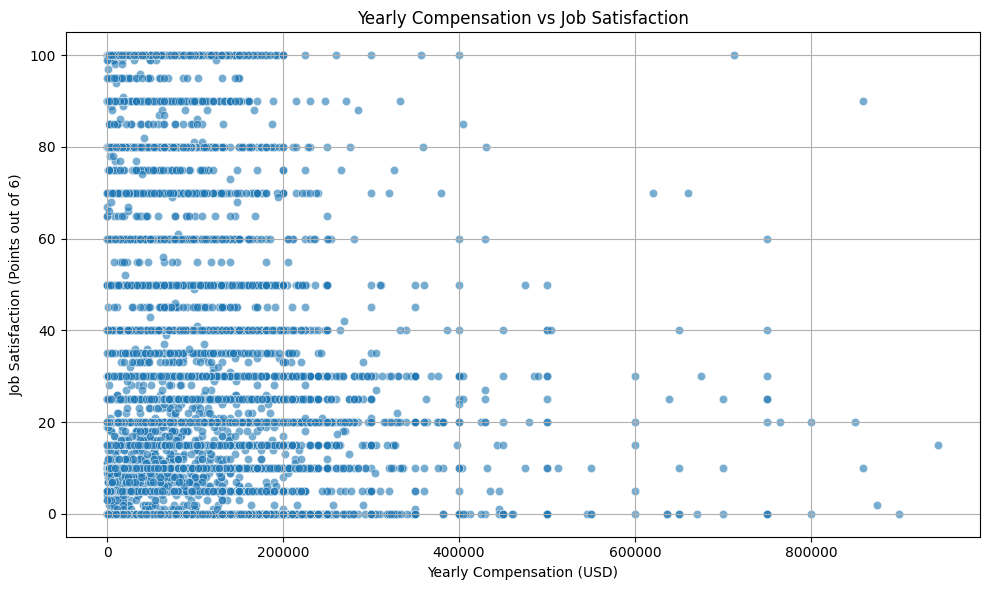

In [23]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv(file_path)

# Optional: Remove extreme compensation outliers to make the plot more readable
df = df[df['ConvertedCompYearly'] < 1e6]  # Adjust the threshold as needed

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ConvertedCompYearly', y='JobSatPoints_6', alpha=0.6)
plt.title('Yearly Compensation vs Job Satisfaction')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (Points out of 6)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


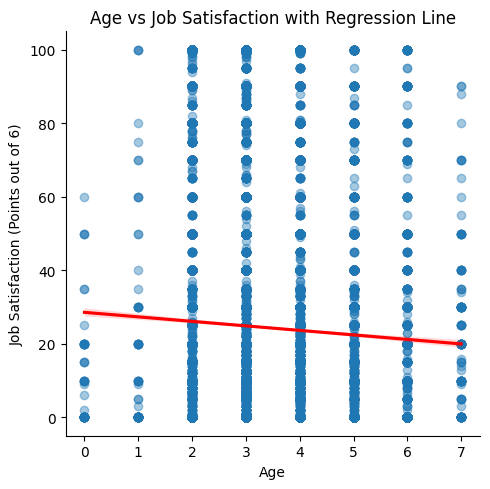

In [31]:
df = pd.read_csv(file_path)

# Drop missing values for clean plotting
df = df[['Age', 'JobSatPoints_6']].dropna()
age_mapping = {
    'Under 18 years old': 1,
    '18-24 years old': 2,
    '25-34 years old': 3,
    '35-44 years old': 4,
    '45-54 years old': 5,
    '55-64 years old': 6,
    '65 years or older': 7,
    'Prefer not to say': 0  # Or use np.nan if you want to exclude it
}

# Apply mapping
df['Age_numeric'] = df['Age'].map(age_mapping)

# Plot with regression line
sns.lmplot(data=df, x='Age_numeric', y='JobSatPoints_6', scatter_kws={'alpha': 0.4}, line_kws={'color': 'red'})
plt.title('Age vs Job Satisfaction with Regression Line')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (Points out of 6)')
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


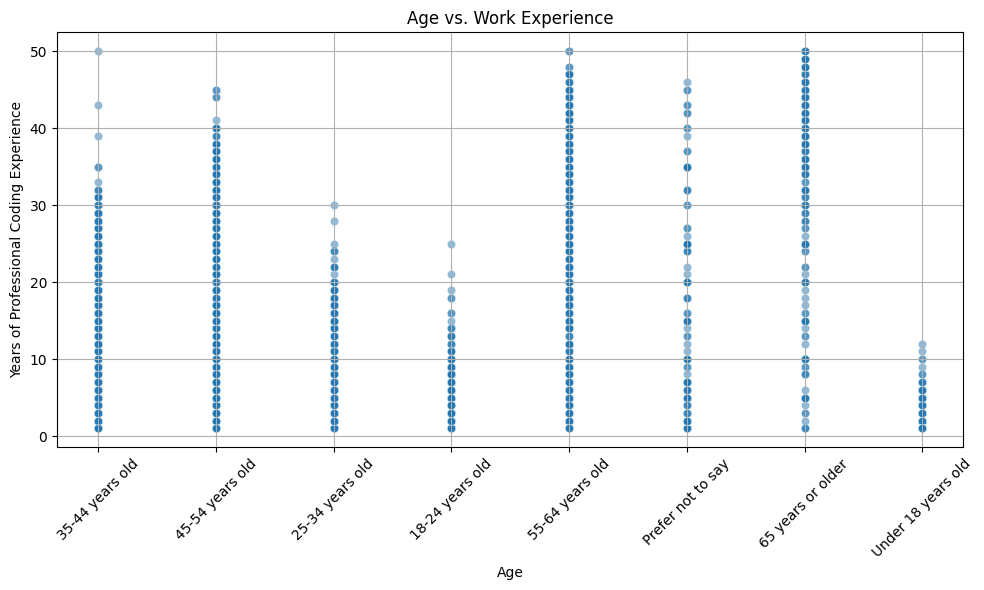

In [33]:
# Load your dataset
df = pd.read_csv(file_path)

# Ensure correct data types and remove NaN values
df = df[['Age', 'YearsCodePro']].dropna()

# Convert 'YearsCodePro' to numeric (in case it has values like 'Less than 1 year' or 'More than 50 years')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop any remaining NaNs after conversion
df = df.dropna()

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='YearsCodePro', alpha=0.5)
plt.xticks(rotation=45)
plt.title('Age vs. Work Experience')
plt.xlabel('Age')
plt.ylabel('Years of Professional Coding Experience')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


/tmp/ipykernel_3188/647263958.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(


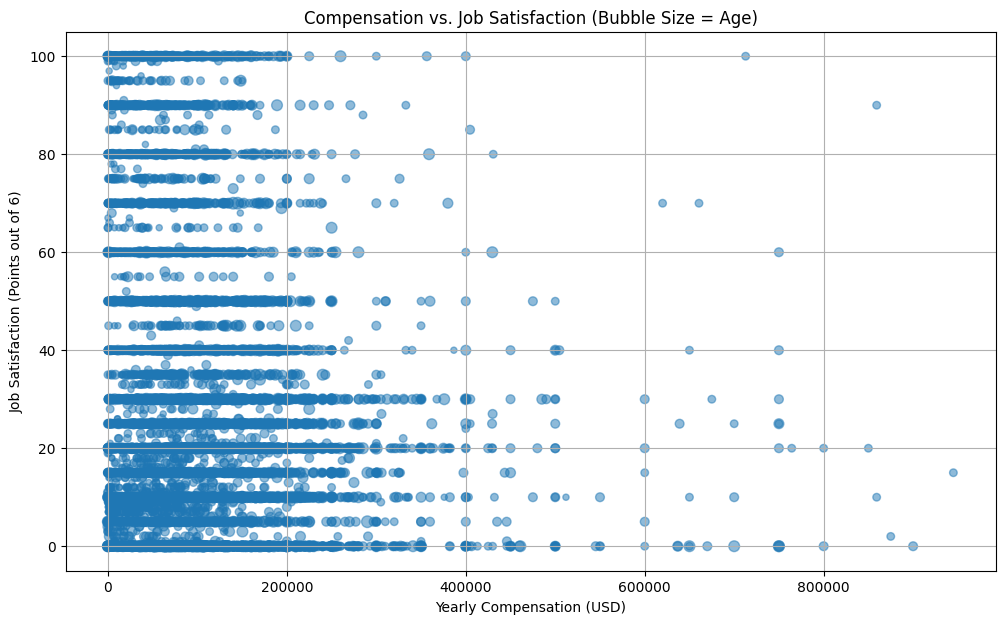

In [44]:
# Load the dataset
df = pd.read_csv(file_path)

# Select relevant columns and drop missing values
df = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Age']].dropna()

# Optional: Remove extreme outliers in compensation for clearer visualization
df = df[df['ConvertedCompYearly'] < 1e6]  # adjust threshold as needed

age_mapping = {
    'Under 18 years old': 1,
    '18-24 years old': 2,
    '25-34 years old': 3,
    '35-44 years old': 4,
    '45-54 years old': 5,
    '55-64 years old': 6,
    '65 years or older': 7,
    'Prefer not to say': 0  # Or use np.nan if you want to exclude it
}

# Apply mapping
df['Age_numeric'] = df['Age'].map(age_mapping)


df['Age_numeric'] = df['Age_numeric'] * 10  # Try different multipliers if needed

# Create the bubble plot
plt.figure(figsize=(12, 7))
scatter = plt.scatter(
    x=df['ConvertedCompYearly'],
    y=df['JobSatPoints_6'],
    s=df['Age_numeric'],
    alpha=0.5,
    # c=df['Age_numeric'],  # optional: color bubbles by age too
    cmap='viridis'
)

# plt.colorbar(scatter, label='Age')  # Shows color scale for age
plt.title('Compensation vs. Job Satisfaction (Bubble Size = Age)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (Points out of 6)')
plt.grid(True)
# plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


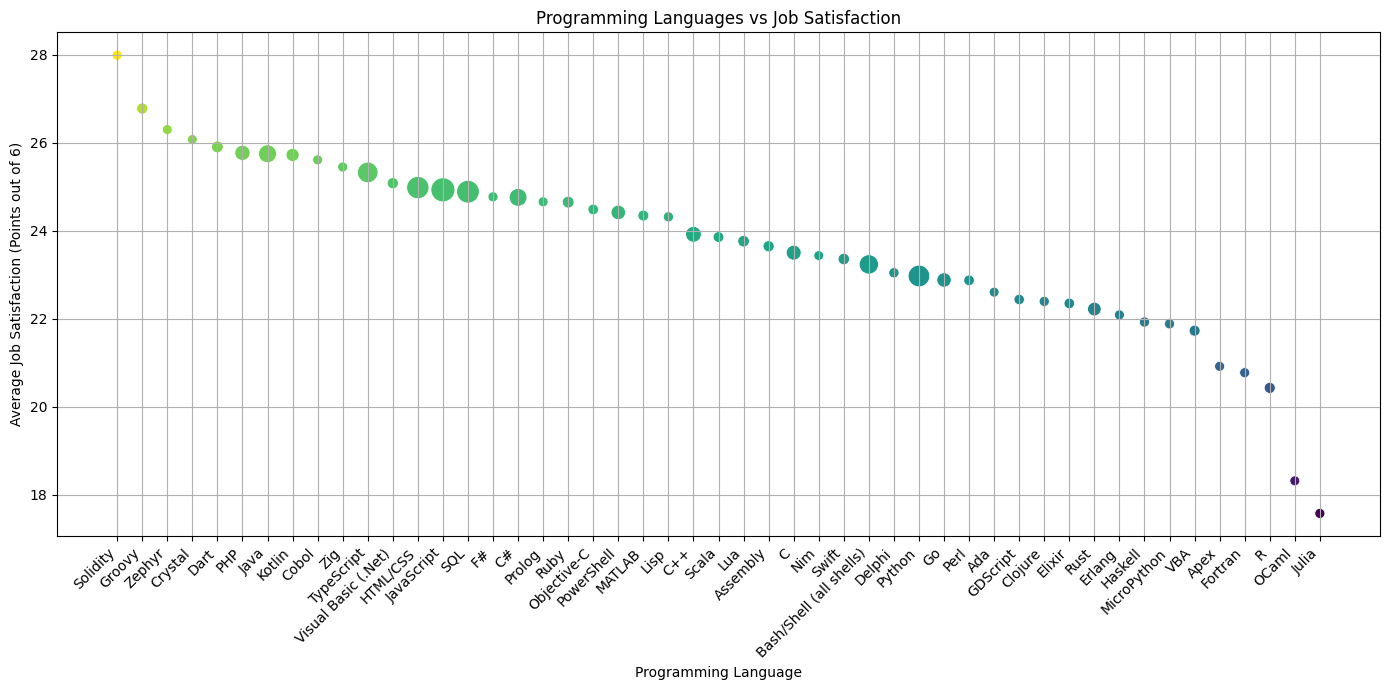

In [49]:
# Load the data
df = pd.read_csv(file_path)

# Drop rows with missing values
df = df[['LanguageHaveWorkedWith', 'JobSatPoints_6']].dropna()

# Expand multiple languages into separate rows
df_expanded = df.assign(Language=df['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

# Strip whitespace
df_expanded['Language'] = df_expanded['Language'].str.strip()

# Group by language and calculate mean job satisfaction and count of responses
lang_satisfaction = df_expanded.groupby('Language').agg(
    AvgJobSat=('JobSatPoints_6', 'mean'),
    Respondents=('JobSatPoints_6', 'count')
).reset_index()

# Filter out languages with very few respondents if needed
# lang_satisfaction = lang_satisfaction[lang_satisfaction['Respondents'] > 30]

# Sort for better readability
lang_satisfaction = lang_satisfaction.sort_values(by='AvgJobSat', ascending=False)

# Plot
plt.figure(figsize=(14, 7))
sns.scatterplot(
    data=lang_satisfaction,
    x='Language',
    y='AvgJobSat',
    size='Respondents',
    hue='AvgJobSat',
    palette='viridis',
    sizes=(50, 300),
    legend=False
)

plt.xticks(rotation=45, ha='right')
plt.title('Programming Languages vs Job Satisfaction')
plt.xlabel('Programming Language')
plt.ylabel('Average Job Satisfaction (Points out of 6)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


/tmp/ipykernel_3188/1471767316.py:26: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


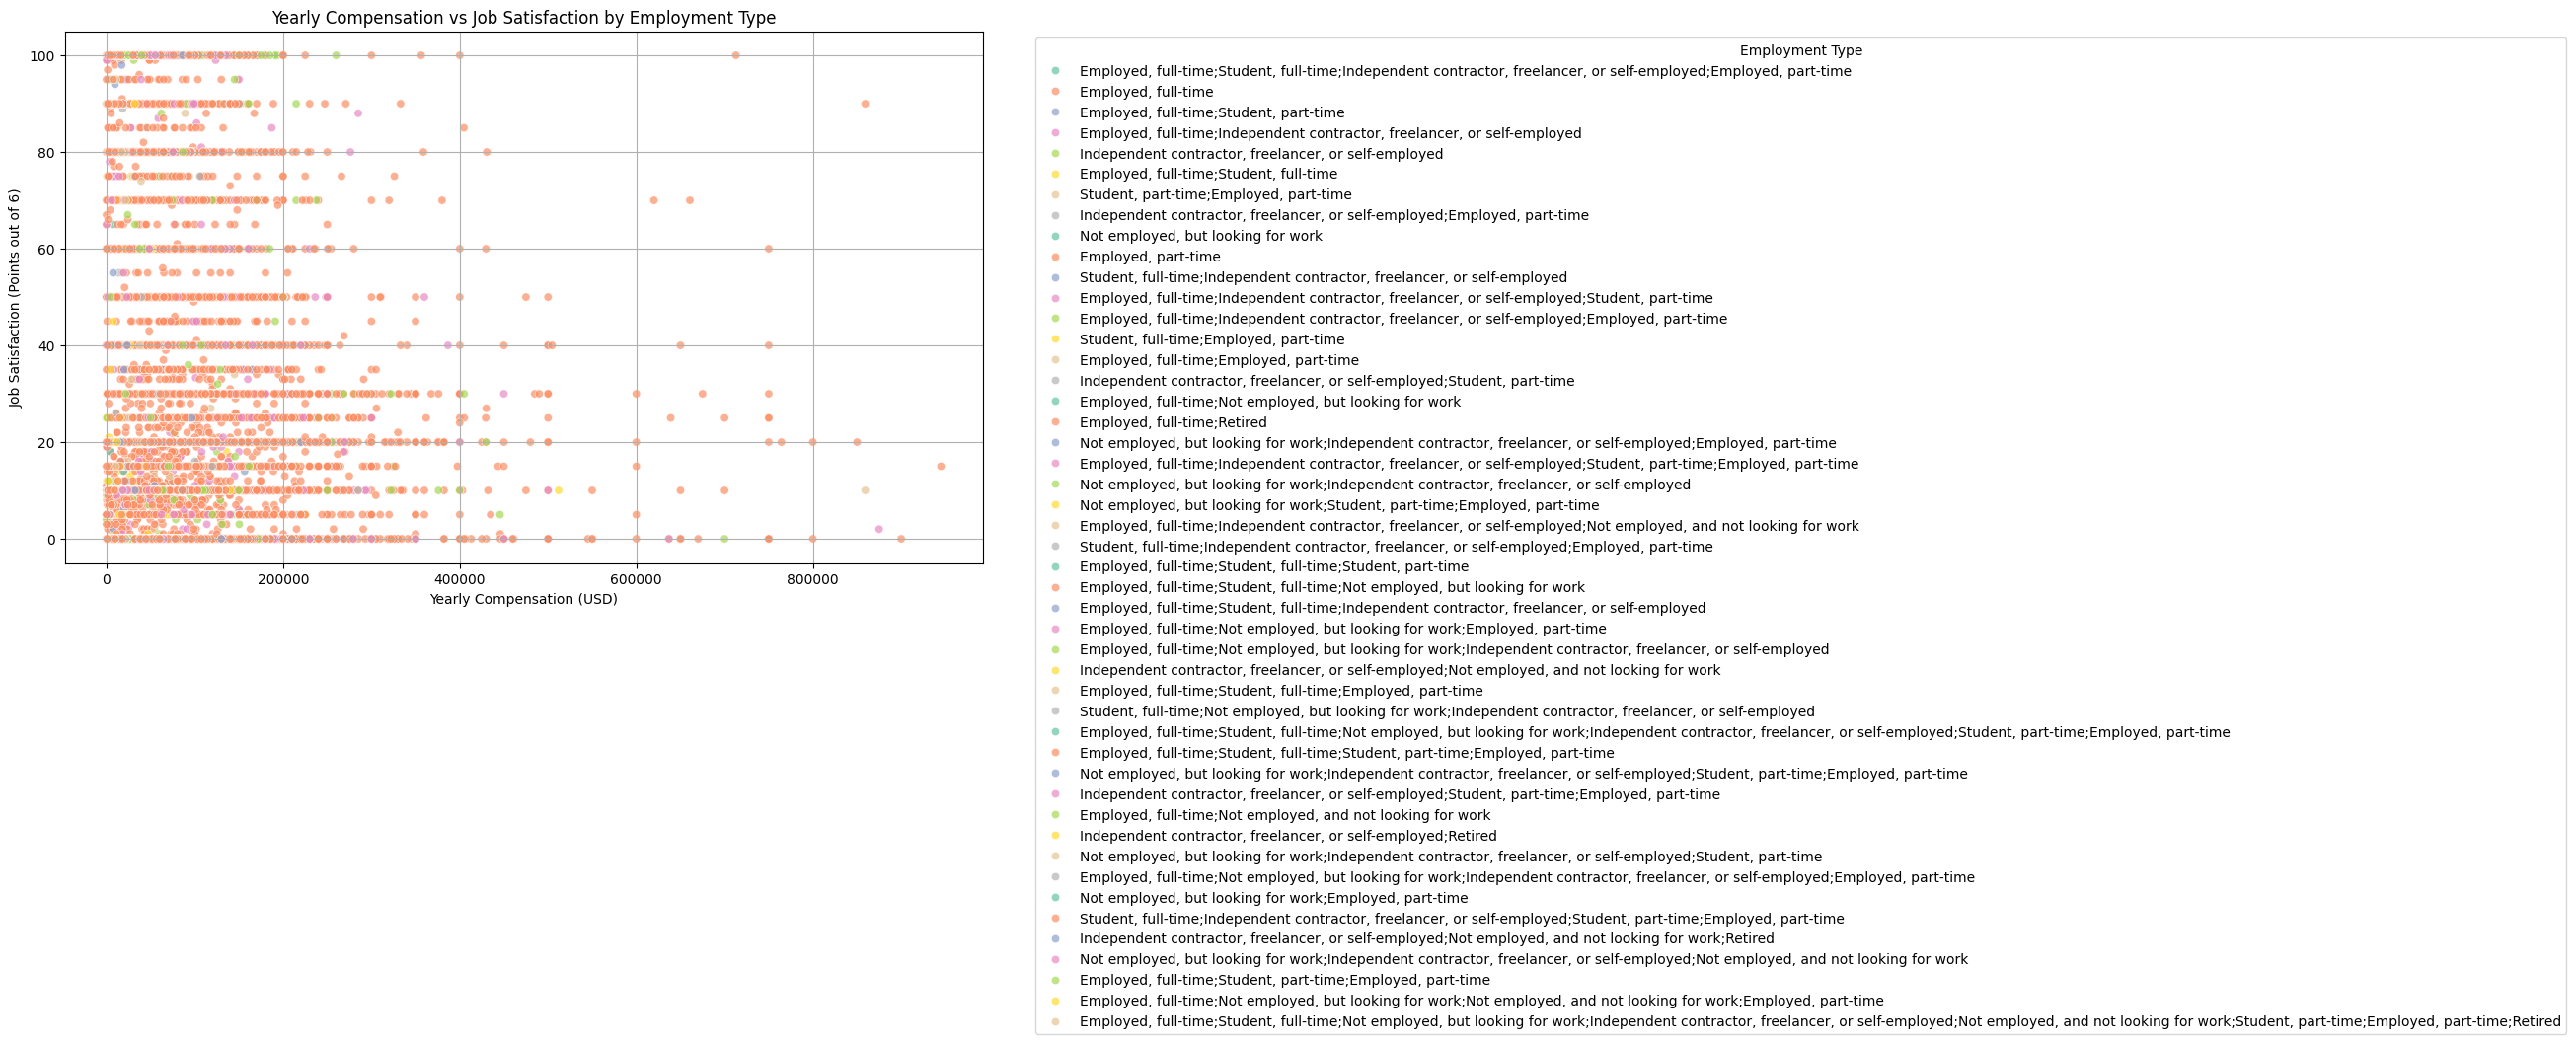

In [48]:
# Load the dataset
df = pd.read_csv(file_path)

# Drop rows with missing values in relevant columns
df_filtered = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Employment']].dropna()

# Optional: Remove extreme outliers in compensation to avoid skewed visuals
df_filtered = df_filtered[df_filtered['ConvertedCompYearly'] < 1e6]  # adjust as needed

# Plot
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_filtered,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    hue='Employment',
    palette='Set2',
    alpha=0.7
)

plt.title('Yearly Compensation vs Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (Points out of 6)')
plt.grid(True)
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


In [ ]:
## Write your code here

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
